<a href="https://colab.research.google.com/github/kellykhy/DL2022-1/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## HW 2
Answer following questions 



### Below is one of the example code for binary-class classification problem on IMDB dataset

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [2]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [3]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [4]:
y_train[:5]

array([1., 0., 0., 1., 0.], dtype=float32)

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [6]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [7]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [8]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 56ms/step - loss: 0.5519 - accuracy: 0.7308 - val_loss: 0.4248 - val_accuracy: 0.8363
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3298 - accuracy: 0.8968 - val_loss: 0.3244 - val_accuracy: 0.8822
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2287 - accuracy: 0.9275 - val_loss: 0.3025 - val_accuracy: 0.8774
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1818 - accuracy: 0.9419 - val_loss: 0.3186 - val_accuracy: 0.8730
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1475 - accuracy: 0.9525 - val_loss: 0.3071 - val_accuracy: 0.8786
Epoch 6/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1200 - accuracy: 0.9639 - val_loss: 0.2940 - val_accuracy: 0.8869
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0976 - accuracy: 0.9703 - val_loss: 0.3451 - val_accuracy: 0.8759
Epoch 8/20
30

### Q1 Binary classification is multi-class classification with two classes so we can modify our model as below:

In [9]:
model2 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(2, activation="softmax")
])

### Complete the codes for compile and model fitting. 

In [10]:
model2.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [11]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [12]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [13]:
history = model2.fit(partial_x_train,
           partial_y_train,
           epochs=20,
           batch_size=512,
           validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 45ms/step - loss: 0.4996 - accuracy: 0.7803 - val_loss: 0.3628 - val_accuracy: 0.8742
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2846 - accuracy: 0.9085 - val_loss: 0.2900 - val_accuracy: 0.8906
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2083 - accuracy: 0.9294 - val_loss: 0.2881 - val_accuracy: 0.8844
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1599 - accuracy: 0.9464 - val_loss: 0.3175 - val_accuracy: 0.8750
Epoch 5/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1329 - accuracy: 0.9563 - val_loss: 0.3037 - val_accuracy: 0.8826
Epoch 6/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1037 - accuracy: 0.9674 - val_loss: 0.3274 - val_accuracy: 0.8807
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - loss: 0.0842 - accuracy: 0.9744 - val_loss: 0.3654 - val_accuracy: 0.8748
Epoch 8/20
30

### Q2 Below is visualization of the validation loss. We can see overfitting after 5 epochs.  

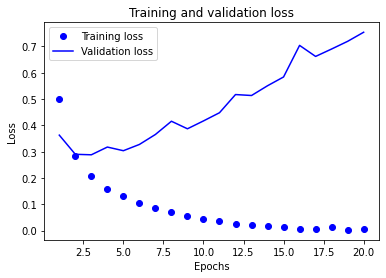

In [14]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Add dropout layers and visualize the validation loss of your new model.

In [15]:
## Add dropout layers 

model2_dr = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(2, activation="softmax")
])

## retrain and visualize the validation loss of new model
model2_dr.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
history2_dr = model2_dr.fit(partial_x_train,
               partial_y_train,
               epochs=20,
               batch_size=512,
               validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 41ms/step - loss: 0.6173 - accuracy: 0.6470 - val_loss: 0.4672 - val_accuracy: 0.8449
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.4927 - accuracy: 0.7747 - val_loss: 0.3746 - val_accuracy: 0.8711
Epoch 3/20
30/30 [==============================] - 1s 42ms/step - loss: 0.4068 - accuracy: 0.8369 - val_loss: 0.3271 - val_accuracy: 0.8735
Epoch 4/20
30/30 [==============================] - 1s 47ms/step - loss: 0.3560 - accuracy: 0.8668 - val_loss: 0.3007 - val_accuracy: 0.8802
Epoch 5/20
30/30 [==============================] - 1s 41ms/step - loss: 0.3009 - accuracy: 0.8916 - val_loss: 0.2836 - val_accuracy: 0.8855
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2642 - accuracy: 0.9067 - val_loss: 0.2794 - val_accuracy: 0.8869
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2307 - accuracy: 0.9188 - val_loss: 0.2886 - val_accuracy: 0.8909
Epoch 8/20
30

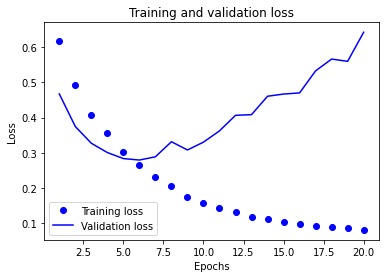

In [16]:
import matplotlib.pyplot as plt
history2_dr_dict = history2_dr.history
loss_values = history2_dr_dict["loss"]
val_loss_values = history2_dr_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Q3 Add l1 regularization on the second dense layer from the original model below. 

In [17]:
## Add l1 regularization on the second dense layers 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
model2_l1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, kernel_regularizer = regularizers.l1(0.001), activation="relu"),    ### add l1 regularization here
    layers.Dense(2, activation="softmax")
])

### Finish the training and compare the dropout model(model from Q2) and l1 regularization model after visualizing their validation losses.

In [18]:
model2_l1.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
history2_l1 = model2_l1.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 45ms/step - loss: 0.5567 - accuracy: 0.7769 - val_loss: 0.4150 - val_accuracy: 0.8721
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3346 - accuracy: 0.9035 - val_loss: 0.3508 - val_accuracy: 0.8795
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2529 - accuracy: 0.9293 - val_loss: 0.3221 - val_accuracy: 0.8888
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2073 - accuracy: 0.9438 - val_loss: 0.3308 - val_accuracy: 0.8829
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1773 - accuracy: 0.9551 - val_loss: 0.3274 - val_accuracy: 0.8863
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1484 - accuracy: 0.9667 - val_loss: 0.3484 - val_accuracy: 0.8825
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1287 - accuracy: 0.9732 - val_loss: 0.3977 - val_accuracy: 0.8707
Epoch 8/20
30

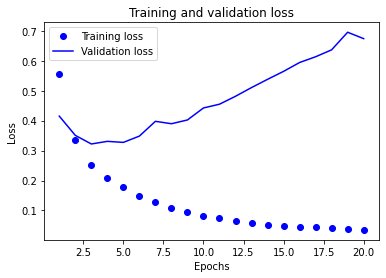

In [19]:
import matplotlib.pyplot as plt
history2_l1_dict = history2_l1.history
loss_values = history2_l1_dict["loss"]
val_loss_values = history2_l1_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

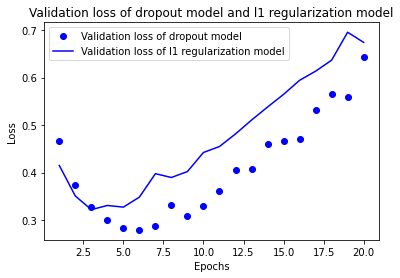

In [20]:
plt.clf()
acc = history2_dr.history["val_loss"]
val_acc = history2_l1.history["val_loss"]
plt.plot(epochs, acc, "bo", label="Validation loss of dropout model")
plt.plot(epochs, val_acc, "b", label="Validation loss of l1 regularization model")
plt.title("Validation loss of dropout model and l1 regularization model")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()